In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from node import Node
from graph import DiGraph
import numpy as np
import matplotlib.pyplot as plt

In [189]:
from vco import VCO
from amplifier import Amplifier
from voltage import Voltage   
from mixer import Mixer
from rack import Rack
from adsr import ADSR

In [211]:
rack = Rack()
fs = 48000 # Hz

voltage_a = Voltage(value = 3)
voltage_d = Voltage(value = 1)
voltage_s = Voltage(value = 0.8)
voltage_r = Voltage(value = 2)
voltage_trigger = Voltage(value = 0)

adsr = ADSR(
    trigger = voltage_trigger,
    attack = voltage_a, 
    delay = voltage_d, 
    sustain = voltage_s, 
    release = voltage_r)

voltage_f = Voltage(value = 1000)
vco_0 = VCO(frequency = voltage_f, fs = fs)
amp_adsr = Amplifier(value = vco_0, gain = adsr)

modules = [voltage_a, 
           voltage_d, 
           voltage_s, 
           voltage_r, 
           voltage_trigger, 
           adsr, 
           voltage_f, 
           vco_0, 
           amp_adsr]
for module in modules:
    rack.add_object(module)

Voltage_4
Voltage_0
Voltage_1
Voltage_2
Voltage_3
ADSR_0
Voltage_5
VCO_0
Amplifier_0


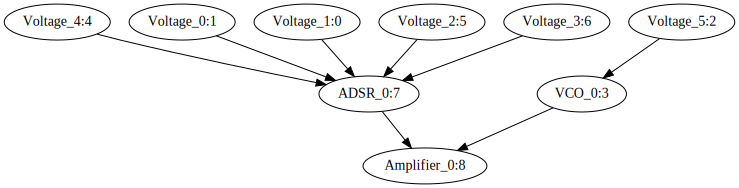

In [212]:
rack.plot()

all right
Status.IDLE
1
0
going attack
going delay
going sustain
all right
Status.SUSTAIN
0
1
going release
going idle


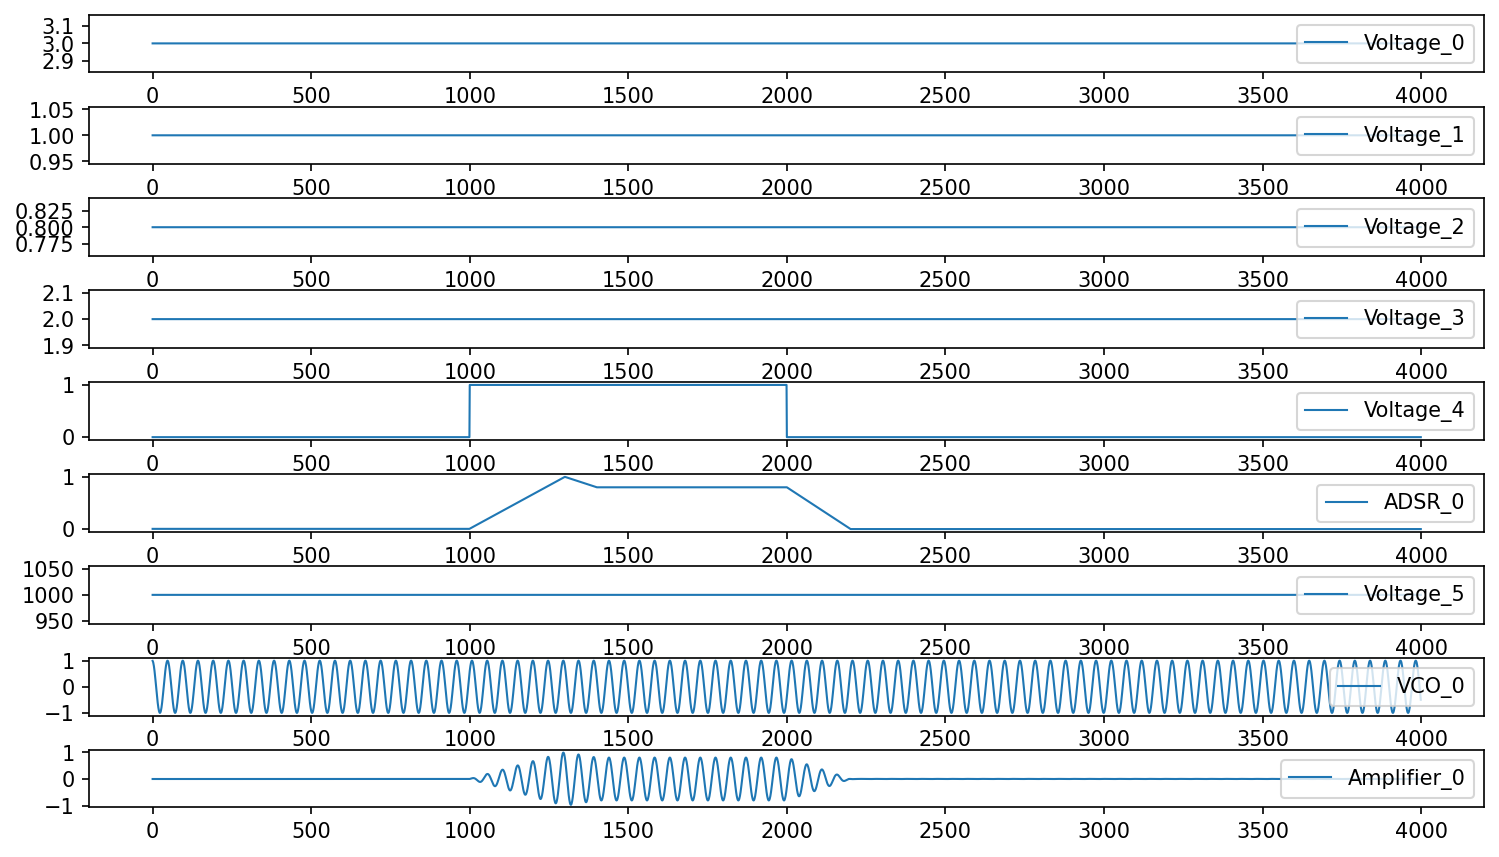

In [213]:
n_ite = 4000
probe = {k:np.zeros(n_ite) for k in rack.objects.keys()}

for iteration in range(n_ite):
    if iteration == 0:
        voltage_trigger.outputs[0] = 0
    if iteration == 1000:
        voltage_trigger.outputs[0] = 1
    if iteration == 2000:
        voltage_trigger.outputs[0] = 0
    rack.step()
    for object_name in rack.objects.keys():
        probe[object_name][iteration] = rack.objects[object_name].outputs[0]
        
plt.figure(figsize = (12, 7), dpi = 150)
for i, object_name in enumerate(rack.objects.keys()):
    plt.subplot(len(rack.objects.keys()), 1, i+1)
    plt.plot(probe[object_name], label = object_name, linewidth = 1)
    plt.legend(loc = 'upper right')
plt.subplots_adjust(hspace = 0.6)